# PySUS no Google Colab - Acesso a dados públicos do SUS

Este notebook demonstra como usar a biblioteca `pysus` para acessar dados do SIH, CNES, SIM, SINASC e Tabnet online diretamente no Google Colab.

In [ ]:
# Instala o pysus diretamente do GitHub
#!pip install git+https://github.com/danicat/pysus.git --upgrade
!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

  Cloning https://github.com/AlertaDengue/PySUS.git to /tmp/pip-req-build-b0fhyyns
  Running command git clone --filter=blob:none --quiet https://github.com/AlertaDengue/PySUS.git /tmp/pip-req-build-b0fhyyns
  Resolved https://github.com/AlertaDengue/PySUS.git to commit 54f7800db4da5171d55e3446d638d64beeb8b149
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.6/462.6 k

🔁 Após rodar a célula acima, reinicie o ambiente: `Ambiente de execução > Reiniciar ambiente de execução` e continue daqui.

In [ ]:
from pysus.online_data.SIH import download as download_sih
from pysus.online_data.CNES import download as download_cnes
from pysus.online_data.SIM import download as download_sim
from pysus.online_data.SINASC import download as download_sinasc

## 📊 SIH - Internações Hospitalares

In [ ]:
# Internações no Paraná (UF = PR), ano 2023, mês 01, tipo RD (resumo de internação hospitalar)

# Baixa o arquivo
parquet_set = download_sih("PR", 2023, 1, "RD")

# Converte para DataFrame
df_sih = parquet_set.to_dataframe()

# Visualiza as primeiras linhas
df_sih.head()

RDPR2301.parquet: 100%|██████████| 262k/262k [00:15<00:00, 16.9kB/s]


,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,410830,2023,01,01,18236227000104,4122102480672,1,85851000,410830,20101106,...,,1,0,0,0,0,0,0,0,0
1,410830,2023,01,03,18236227000104,4122102480419,1,85867000,410830,20020907,...,,0,0,0,0,0,0,0,0,0
2,410830,2023,01,03,18236227000104,4122102480463,1,85862207,410830,19531221,...,,0,0,0,0,0,0,0,0,0
3,410830,2023,01,03,18236227000104,4122102480496,1,85867150,410830,19601230,...,,0,0,0,0,0,0,0,0,0
4,410830,2023,01,03,18236227000104,4122102480640,1,85858000,410830,19581217,...,,0,0,0,0,0,0,0,0,0


## 🏥 CNES - Cadastro Nacional de Estabelecimentos de Saúde

In [ ]:
# Exemplo: baixar dados da tabela ST (Estabelecimentos de Saúde) de 2023

# Baixar dados da tabela ST (Estabelecimentos de Saúde) para janeiro de 2023
parquet_set = download_cnes("ST", states=["PR"], years=[2023], months=[1])

# Converter para DataFrame
df_cnes = parquet_set.to_dataframe()

# Visualizar as primeiras linhas
df_cnes.head()

STPR2301.parquet: 100%|██████████| 75.4k/75.4k [00:09<00:00, 7.68kB/s]


,CNES,CODUFMUN,COD_CEP,CPF_CNPJ,PF_PJ,NIV_DEP,CNPJ_MAN,COD_IR,REGSAUDE,MICR_REG,...,AP07CV02,AP07CV03,AP07CV04,AP07CV05,AP07CV06,AP07CV07,ATEND_PR,DT_ATUAL,COMPETEN,NAT_JUR
0,7690525,412820,84600270,00005033515985,1,1,00000000000000,,06,,...,0,0,0,0,0,0,1,202207,202301,4000
1,7690533,412820,84600270,00005171388911,1,1,00000000000000,,06,,...,0,0,0,0,0,0,1,202210,202301,4000
2,7703929,412820,84600290,00003289888983,1,1,00000000000000,,06,,...,0,0,0,0,0,0,1,202207,202301,4000
3,7720084,412820,84603024,12312254000124,3,1,00000000000000,,06,,...,0,0,0,0,0,0,1,201910,202301,2135
4,7737947,412820,84600900,22243238000180,3,1,00000000000000,,06,,...,0,0,0,0,0,0,1,202210,202301,2232


## ⚰️ SIM - Sistema de Informações sobre Mortalidade

In [ ]:
# Parâmetros
grupo = "CID10"         # Declaração de óbito completa
estados = ["PR"]     # Sigla do estado como string em uma lista
anos = [2022]        # Ano em lista

# Baixando os dados
parquet_set = download_sim(grupo, states=estados, years=anos)

# Convertendo para DataFrame
df_sim = parquet_set.to_dataframe()

# Visualizando as primeiras linhas
df_sim.head()

7612277it [00:00, 6972745986.07it/s] 


,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,2,18042022,1259,841,410550,24061969,452,1,4,...,,,,,,,,,,506615
1,1,2,16042022,1237,835,352370,29121922,499,2,1,...,,,,,,,,,,506616
2,1,2,15042022,1132,016,,16031934,488,2,1,...,,,,,,,,,,506617
3,1,2,18042022,0910,,,08071938,483,2,4,...,,,,,,,,,,506618
4,1,2,18042022,2340,835,354250,29081929,492,2,1,...,,,,,,,,,,506619


## 👶 SINASC - Sistema de Informações sobre Nascidos Vivos

In [ ]:
# Parâmetros
grupo = "DN"          # Dados completos de nascidos vivos
estados = ["PR"]      # Estado: Paraná
anos = [2022]         # Ano

# Baixando os dados
parquet_set = download_sinasc(grupo, states=estados, years=anos)

# Convertendo para DataFrame
df_sinasc = parquet_set.to_dataframe()

# Visualizando as primeiras linhas
df_sinasc.head()

7041480it [00:00, 7387220542.75it/s] 


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR
0,1,3000907,410690,1,34,1,4,261205,02,00,...,3,28072022,06,0,1,1,05,1,5,2297772
1,1,3000907,410690,1,35,1,5,333115,01,00,...,3,25072022,08,0,1,1,05,1,5,2297773
2,1,2715864,410690,1,20,1,4,999992,01,00,...,4,29072022,04,0,1,1,04,1,1,2297774
3,1,3000907,410690,1,35,2,5,241005,01,00,...,3,25072022,08,0,1,1,03,1,5,2297775
4,1,3000877,410690,1,27,2,5,252210,00,00,...,3,26072022,08,0,1,1,02,0,5,2297776


# Teste com o GPT (codificando para nós)
Pedimos o seguinte comando no GPT: "Quero que me dê um trecho de código compatível com o desse exemplo, mas que me traga a mortalidade no Brasil do ano de 2020 causada pelo cid10 de tuberculose."

Então, ele nos deu o código abaixo (removemos apenas a parte de instação do pysus, porque já o temos na primeira linha).

In [ ]:
# Importações necessárias
from pysus.online_data.SIM import download as download_sim
import pandas as pd

# Parâmetros
grupo = "CID10"        # Declaração de óbito completa por causa básica (CID-10)
estados = ["BR"]       # "BR" para o Brasil inteiro
anos = [2020]          # Ano desejado

# Baixando os dados do SIM
parquet_set = download_sim(grupo, states=estados, years=anos)

# Convertendo para DataFrame
df_sim = parquet_set.to_dataframe()

# Filtrando apenas os óbitos por tuberculose (CID10 entre A15 e A19)
df_tb = df_sim[df_sim['CAUSABAS'].str.startswith(('A15', 'A16', 'A17', 'A18', 'A19'))]

# Visualizando os primeiros registros
df_tb.head()


DOBR2020.parquet: 100%|██████████| 3.81M/3.81M [03:30<00:00, 18.1kB/s]


,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
60,1,2,15102020,2010,833,330455,05061981,439,1,4,...,,,,,,,,,,1230061
339,1,2,15102020,1744,835,352720,27021946,474,1,1,...,,,,,,,,,,1230340
1040,1,2,15102020,1023,829,292740,22031988,432,1,4,...,,,,,,,,,,1231041
1619,1,2,16102020,0330,841,412390,25041976,444,1,4,...,,,,,,,,,,1231620
2208,1,2,16102020,1900,835,355030,19031968,452,1,,...,,,,,,,,,,1232209


# Gráfico sugerido pelo GPT para o DataSet df_tb com o seguinte comando:

Eu quero uma sugestão de código python para usar no Google Colab para criar algum gráfico de exemplo a partir de df_tb que seja bem didático e que possa trazer insights para um pesquisador do tema.

O primeiro código produziu um gráfico vazio. O segundo código após mostrarmos ao GPT o resultado vazio produziu erro complexo. Então, copiamos o resultado das cinco primeiras linhas da tabela de origem dos dados e fornecemos ao GPT para que ele compreendesse os dados. Ele gerou um código com pequenos erros e ao alimentarmos o GPT com esses erros residuais, ele devolveu o código a seguir que produziu o gráfico seguinte.

A justificativa desse gráfico dada pelo gpt foi de que:

✅ Por que esse gráfico é didático?

Mostra disparidades por sexo e faixa etária, comuns na tuberculose.
Pode indicar grupos vulneráveis, como idosos ou adultos jovens (dependendo do pico).
Ajuda a visualizar onde intervenções ou pesquisas específicas podem ser focadas.


<ipython-input-7-2f7ed887fbdb>:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df_tb.groupby(['FAIXA_ETARIA', 'SEXO']).size().reset_index(name='Óbitos')


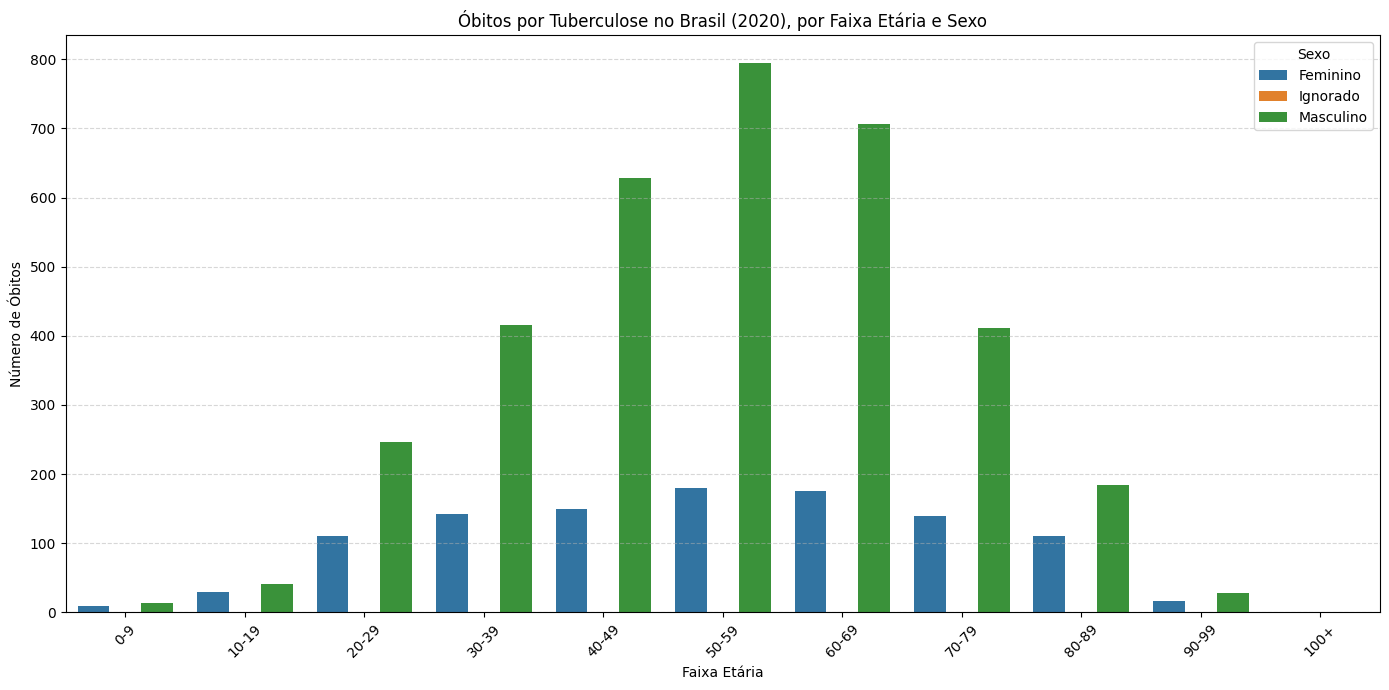

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Garantir que df_tb seja uma cópia independente
df_tb = df_tb.copy()

# Corrigir coluna IDADE
def converter_idade(cod):
    try:
        cod = int(cod)
        if 400 <= cod <= 499:
            return cod - 400  # anos completos
        elif 300 <= cod <= 399:
            return 0  # menor de 1 ano
        else:
            return None
    except:
        return None

df_tb['IDADE_ANOS'] = df_tb['IDADE'].apply(converter_idade)

# Converter SEXO para string e mapear
df_tb['SEXO'] = df_tb['SEXO'].astype(str).replace({
    '1': 'Masculino',
    '2': 'Feminino',
    '0': 'Ignorado'
})

# Criar faixas etárias
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 150]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49',
          '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df_tb['FAIXA_ETARIA'] = pd.cut(df_tb['IDADE_ANOS'], bins=bins, labels=labels, right=True)

# Agrupar dados
df_plot = df_tb.groupby(['FAIXA_ETARIA', 'SEXO']).size().reset_index(name='Óbitos')
df_plot = df_plot.dropna(subset=['FAIXA_ETARIA', 'SEXO'])

# Gráfico
plt.figure(figsize=(14, 7))
sns.barplot(data=df_plot, x='FAIXA_ETARIA', y='Óbitos', hue='SEXO')
plt.title('Óbitos por Tuberculose no Brasil (2020), por Faixa Etária e Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# Agora outro gráfico sugerido pelo gpt com os mesmos dados:

1. Gráfico de barras horizontais por estado (UF)
Mostra onde há maior número absoluto de mortes por tuberculose. Pode ser o primeiro passo para identificar focos regionais.

Tipo: Barra horizontal

Mostra:

A distribuição absoluta de óbitos por tuberculose em cada estado brasileiro.

Destaques regionais (ex: maiores números em RJ, SP, PA, etc).

Pode indicar focos geográficos prioritários para intervenção.

Útil para:
✅ Análise territorial macro
✅ Relatórios de gestão estadual
✅ Planejamento de recursos

<ipython-input-8-959cee7fa7d2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_uf, y='UF', x='Óbitos', palette='coolwarm')


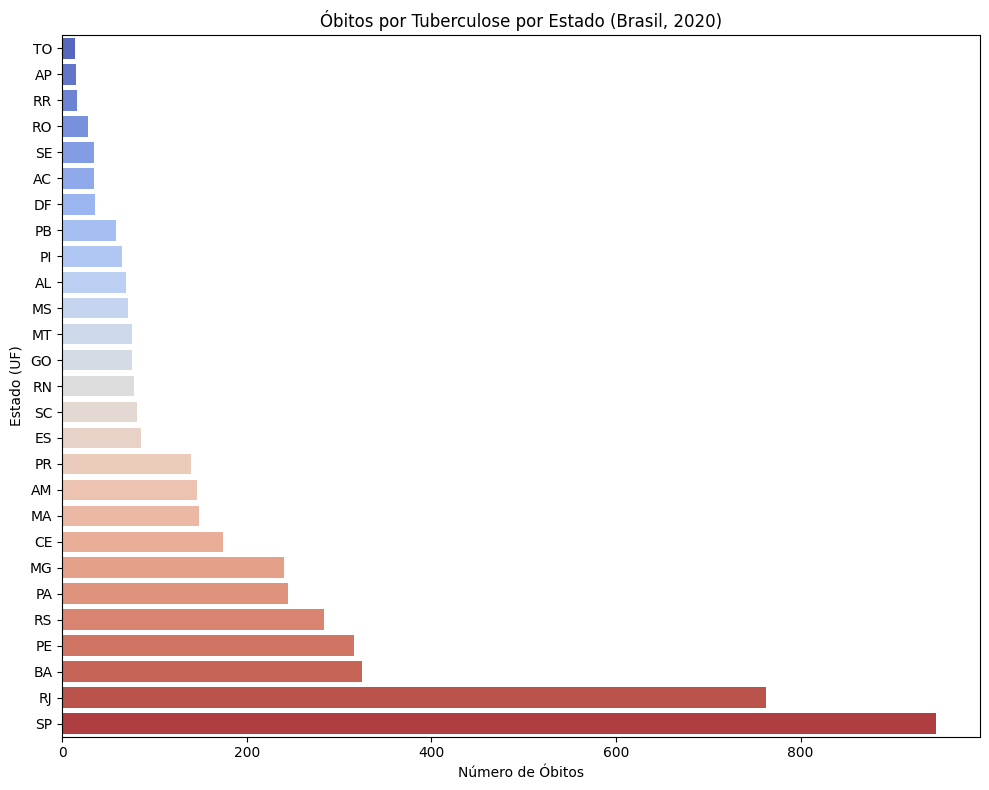

In [ ]:
# Contar óbitos por estado de ocorrência
df_tb['UF'] = df_tb['CODMUNOCOR'].astype(str).str[:2]  # extrai os dois primeiros dígitos do código IBGE

# Criar mapa UF → sigla
uf_map = {
    '11': 'RO', '12': 'AC', '13': 'AM', '14': 'RR', '15': 'PA', '16': 'AP', '17': 'TO',
    '21': 'MA', '22': 'PI', '23': 'CE', '24': 'RN', '25': 'PB', '26': 'PE', '27': 'AL', '28': 'SE', '29': 'BA',
    '31': 'MG', '32': 'ES', '33': 'RJ', '35': 'SP',
    '41': 'PR', '42': 'SC', '43': 'RS',
    '50': 'MS', '51': 'MT', '52': 'GO', '53': 'DF'
}
df_tb['UF'] = df_tb['UF'].map(uf_map)

# Agrupar
df_uf = df_tb.groupby('UF').size().reset_index(name='Óbitos').sort_values(by='Óbitos', ascending=True)

# Plotar
plt.figure(figsize=(10, 8))
sns.barplot(data=df_uf, y='UF', x='Óbitos', palette='coolwarm')
plt.title('Óbitos por Tuberculose por Estado (Brasil, 2020)')
plt.xlabel('Número de Óbitos')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()


# 2. Pirâmide etária por sexo
Ótima para visualizar o perfil demográfico das mortes. É um clássico em epidemiologia.

Tipo: Gráfico de barras horizontais, com homens à esquerda e mulheres à direita

Mostra:

A distribuição etária dos óbitos, separados por sexo.

Permite identificar grupos etários mais afetados e diferenças de gênero.

Útil para:
✅ Estudos demográficos
✅ Comparações entre sexos
✅ Avaliação de risco por faixa etária

<ipython-input-9-66cba222157c>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_piramide = df_tb.groupby(['FAIXA_ETARIA', 'SEXO']).size().unstack(fill_value=0)


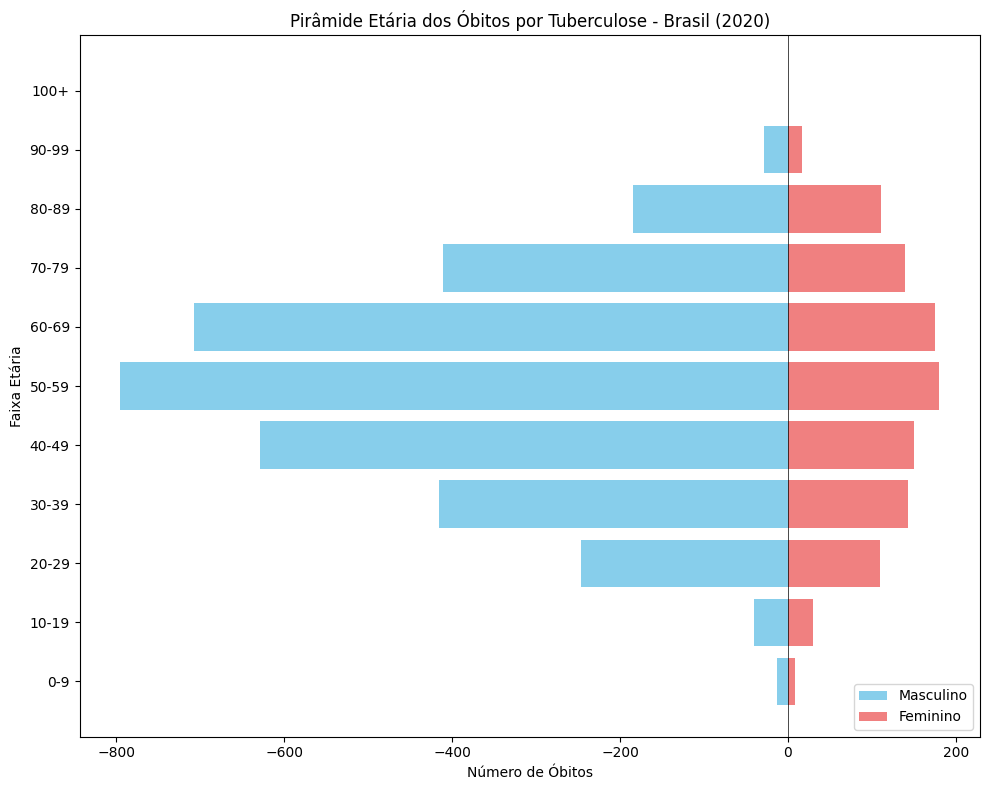

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir faixas etárias
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 150]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49',
          '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

df_tb['FAIXA_ETARIA'] = pd.cut(df_tb['IDADE_ANOS'], bins=bins, labels=labels, right=True)

# Agrupar por faixa etária e sexo
df_piramide = df_tb.groupby(['FAIXA_ETARIA', 'SEXO']).size().unstack(fill_value=0)

# Garantir que todos os rótulos estejam presentes
df_piramide = df_piramide.reindex(labels)

# Valores negativos para o sexo masculino (lado esquerdo da pirâmide)
df_piramide['Masculino'] = -df_piramide.get('Masculino', 0)
df_piramide['Feminino'] = df_piramide.get('Feminino', 0)

# Plotar
plt.figure(figsize=(10, 8))
plt.barh(df_piramide.index, df_piramide['Masculino'], color='skyblue', label='Masculino')
plt.barh(df_piramide.index, df_piramide['Feminino'], color='lightcoral', label='Feminino')
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Pirâmide Etária dos Óbitos por Tuberculose - Brasil (2020)')
plt.xlabel('Número de Óbitos')
plt.ylabel('Faixa Etária')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# 3. Mapa do Brasil por município com mortes por tuberculose (choropleth map)

Tipo: Mapa temático com intensidade de cor

Mostra:

A distribuição municipal dos óbitos por tuberculose.

Municípios com maior carga de mortalidade aparecem em vermelho mais intenso.

Permite visualizar hotspots e desigualdades regionais.

Útil para:
✅ Vigilância epidemiológica
✅ Priorização de municípios
✅ Apresentações técnicas para gestores

<Figure size 1800x1500 with 0 Axes>

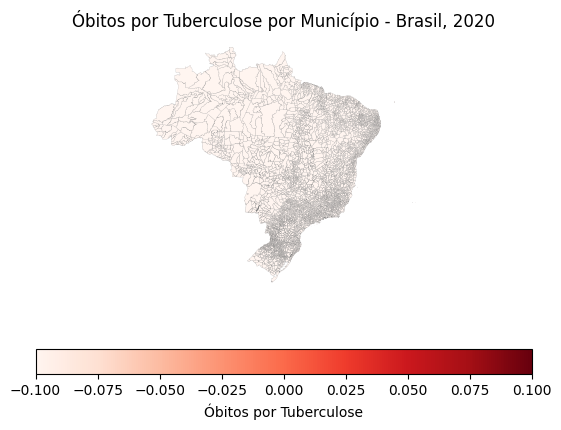

In [ ]:
# Instalar o pacote necessário
!pip install geobr

# Importar bibliotecas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geobr import read_municipality

# Baixar os dados dos municípios brasileiros diretamente do IBGE usando geobr
gdf = read_municipality(year=2020)

# Verificar as primeiras linhas para entender a estrutura
#print(gdf.head())  # Você pode descomentar se quiser checar

# Converter a coluna 'code_muni' (código do município) para inteiro
gdf['code_muni'] = gdf['code_muni'].astype(int)

# Preparar os dados de óbitos por município
# Certifique-se de que df_tb já está definido antes deste bloco
df_mapa = df_tb.copy()
df_mapa['CODMUNOCOR'] = pd.to_numeric(df_mapa['CODMUNOCOR'], errors='coerce')
df_obitos_mun = df_mapa.groupby('CODMUNOCOR').size().reset_index(name='obitos')

# Mesclar os dados de óbitos com o GeoDataFrame
gdf = gdf.merge(df_obitos_mun, left_on='code_muni', right_on='CODMUNOCOR', how='left')
gdf['obitos'] = gdf['obitos'].fillna(0)

# Plotar o mapa com tamanho maior
plt.figure(figsize=(18, 15))  # Aumentando o tamanho do gráfico
gdf.plot(column='obitos', cmap='Reds', linewidth=0.1, edgecolor='gray', legend=True,
         legend_kwds={'label': "Óbitos por Tuberculose", 'orientation': "horizontal"})
plt.title('Óbitos por Tuberculose por Município - Brasil, 2020')
plt.axis('off')
plt.show()


# 4. Gráfico de dispersão idade x hora do óbito
Esse é curioso e exploratório, pode revelar padrões temporais (se há mais mortes em determinado horário, faixa etária etc.).

Tipo: Scatter plot
Mostra:

Cada ponto representa um óbito, com idade no eixo Y e hora do óbito no eixo X.

Pode revelar padrões temporais de mortalidade (ex: mais óbitos pela manhã ou madrugada).

Exploratório, pode levantar hipóteses.

Útil para:
✅ Investigações clínicas e hospitalares
✅ Estudos sobre padrão de óbitos intradiários
✅ Curiosidade científica e hipóteses

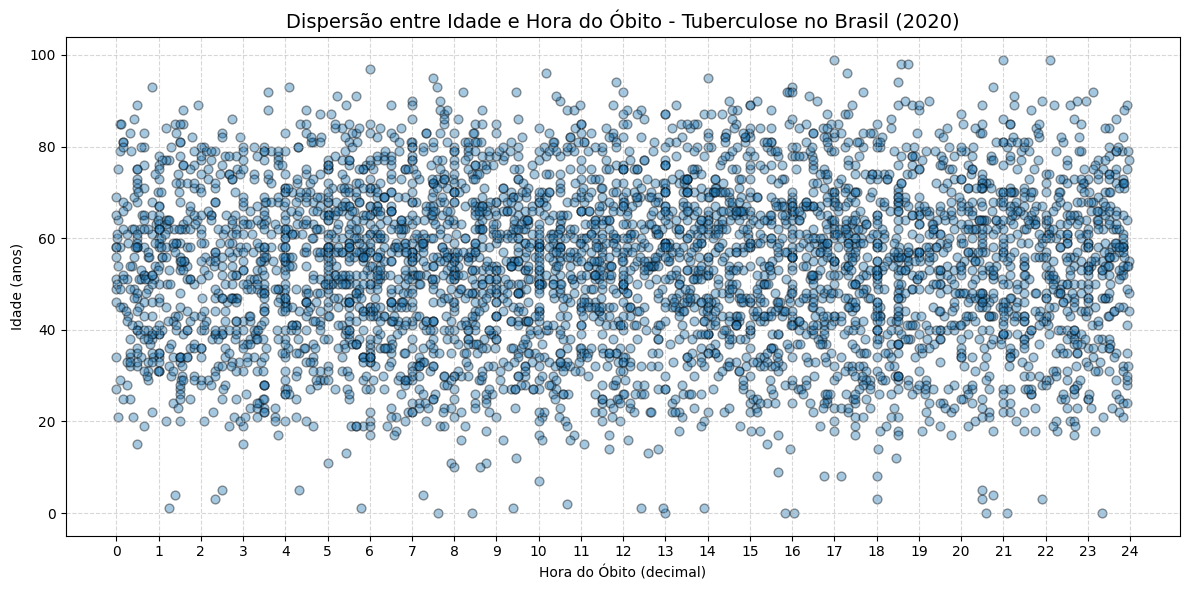

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Copiar o DataFrame e garantir consistência nos tipos
df_disp = df_tb.copy()

# Garantir IDADE_ANOS numérica
df_disp['IDADE_ANOS'] = pd.to_numeric(df_disp['IDADE_ANOS'], errors='coerce')

# Converter HORAOBITO para hora decimal (ex: 1020 -> 10.33)
def hora_para_decimal(horario):
    try:
        horario = int(horario)
        horas = horario // 100
        minutos = horario % 100
        return horas + minutos / 60
    except:
        return None

df_disp['HORA_DECIMAL'] = df_disp['HORAOBITO'].apply(hora_para_decimal)

# Remover valores faltantes
df_disp = df_disp.dropna(subset=['IDADE_ANOS', 'HORA_DECIMAL'])

# Plotar gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df_disp['HORA_DECIMAL'], df_disp['IDADE_ANOS'], alpha=0.4, edgecolors='k', s=40)
plt.title('Dispersão entre Idade e Hora do Óbito - Tuberculose no Brasil (2020)', fontsize=14)
plt.xlabel('Hora do Óbito (decimal)')
plt.ylabel('Idade (anos)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 25))
plt.tight_layout()
plt.show()


# 5. Gráfico de mortalidade proporcional por sexo
Mostra se há diferença significativa na proporção de óbitos entre homens e mulheres — útil em artigos.

🧠 O que esse gráfico mostra:
Diferença percentual clara entre os sexos.

Caso haja uma proporção masculina muito maior (como costuma ocorrer na tuberculose), isso fica evidenciado de forma objetiva e visual.

Você pode usar esse gráfico como base para discussão em artigo sobre fatores de risco ou desigualdades em saúde.

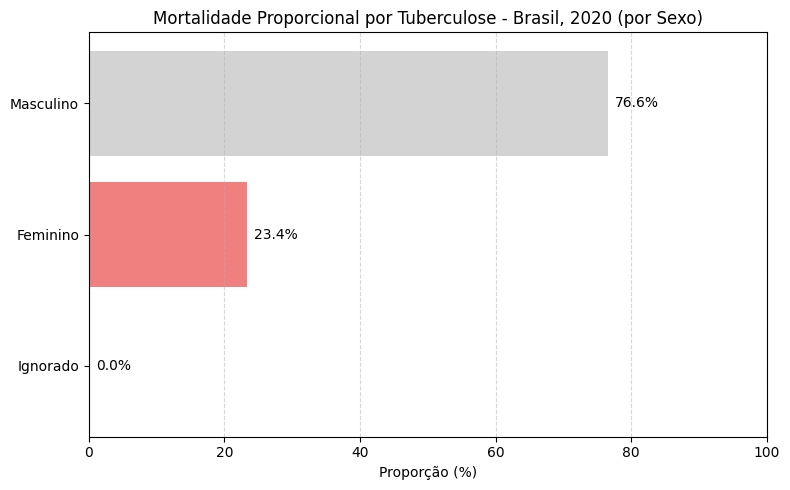

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cópia limpa do DataFrame
df_sexo = df_tb.copy()

# Agrupamento e contagem por sexo
proporcao = df_sexo['SEXO'].value_counts(normalize=True).reset_index()
proporcao.columns = ['Sexo', 'Proporção']
proporcao['Sexo'] = proporcao['Sexo'].replace({
    'Masculino': 'Masculino',
    'Feminino': 'Feminino',
    'Ignorado': 'Ignorado'
})

# Ordenar para visualização
proporcao = proporcao.sort_values(by='Proporção', ascending=True)

# Converter proporção para percentual
proporcao['Percentual'] = proporcao['Proporção'] * 100

# Gráfico
plt.figure(figsize=(8, 5))
bars = plt.barh(proporcao['Sexo'], proporcao['Percentual'], color=['skyblue', 'lightcoral', 'lightgray'])
plt.xlabel('Proporção (%)')
plt.title('Mortalidade Proporcional por Tuberculose - Brasil, 2020 (por Sexo)')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adicionar rótulos
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center')

plt.xlim(0, 100)
plt.tight_layout()
plt.show()


# 6. Óbitos por faixa etária × UF (estado)
Esse gráfico mostra como a mortalidade por tuberculose está distribuída por faixa etária nos diferentes estados — ótimo para detectar padrões locais.

💡 O que esse heatmap pode revelar:
Estados com maior concentração de óbitos em faixas jovens ou idosas.

Diferenças regionais no perfil da mortalidade.

Potenciais ineficiências em detecção precoce.

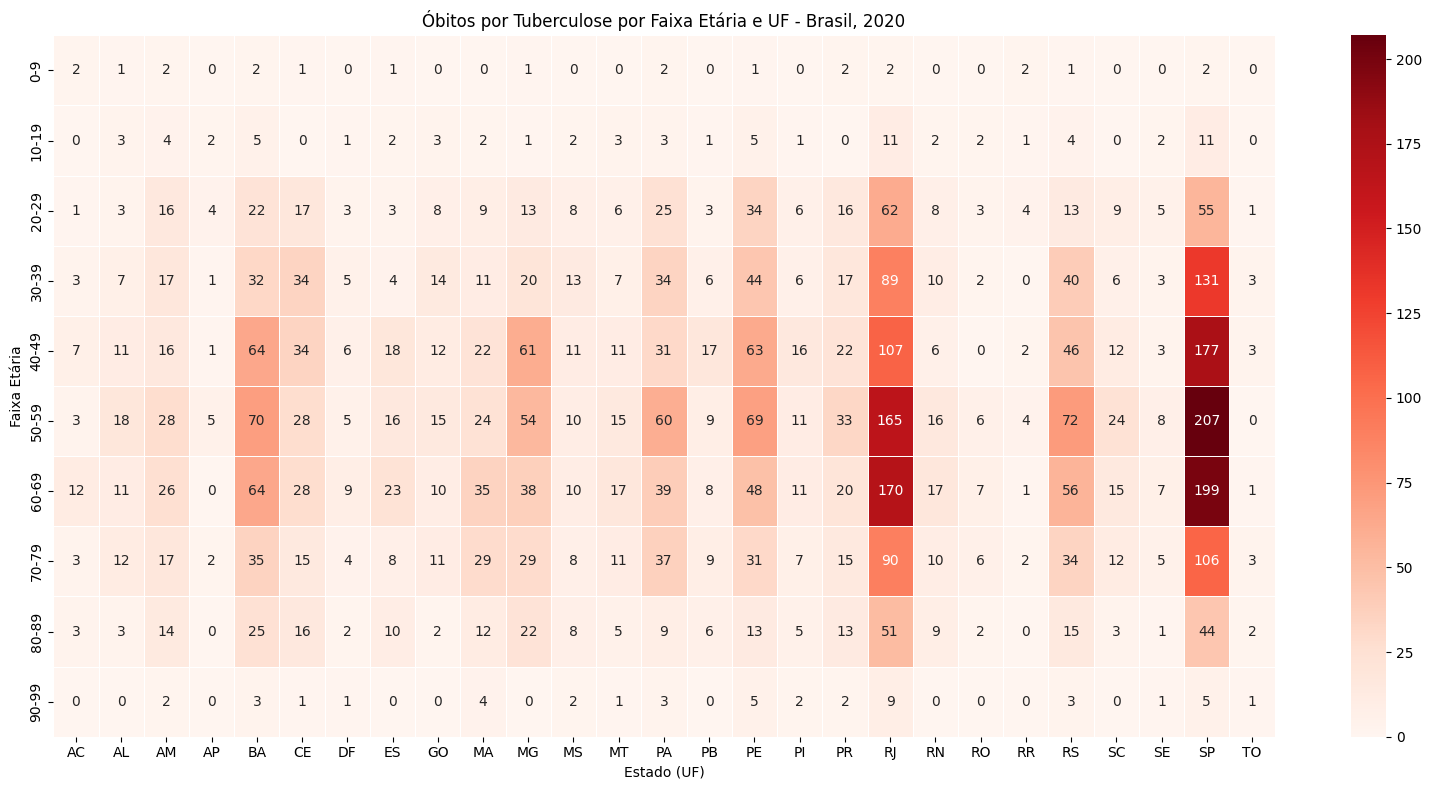

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cópia e limpeza
df_heat = df_tb.copy()

# Converter faixa etária
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 150]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49',
          '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df_heat['IDADE_ANOS'] = pd.to_numeric(df_heat['IDADE_ANOS'], errors='coerce')
df_heat['FAIXA_ETARIA'] = pd.cut(df_heat['IDADE_ANOS'], bins=bins, labels=labels)

# Criar coluna de UF a partir de CODMUNOCOR (2 primeiros dígitos)
df_heat['UF'] = df_heat['CODMUNOCOR'].astype(str).str[:2]
uf_map = {
    '11': 'RO', '12': 'AC', '13': 'AM', '14': 'RR', '15': 'PA', '16': 'AP', '17': 'TO',
    '21': 'MA', '22': 'PI', '23': 'CE', '24': 'RN', '25': 'PB', '26': 'PE', '27': 'AL',
    '28': 'SE', '29': 'BA', '31': 'MG', '32': 'ES', '33': 'RJ', '35': 'SP',
    '41': 'PR', '42': 'SC', '43': 'RS', '50': 'MS', '51': 'MT', '52': 'GO', '53': 'DF'
}
df_heat['UF'] = df_heat['UF'].map(uf_map)

# Criar tabela cruzada
tabela = pd.crosstab(df_heat['FAIXA_ETARIA'], df_heat['UF'])

# Plotar heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(tabela, cmap="Reds", annot=True, fmt='d', linewidths=.5)
plt.title('Óbitos por Tuberculose por Faixa Etária e UF - Brasil, 2020')
plt.xlabel('Estado (UF)')
plt.ylabel('Faixa Etária')
plt.tight_layout()
plt.show()


# Exemplo de dados do SIA (Produção ambulatorial)

In [ ]:
# Mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Importações após reiniciar o ambiente
from pysus.online_data.SIA import download as download_sia

# Parâmetros: estado PR, ano 2023, mês 01, tipo PA (Produção Ambulatorial)
parquet_set = download_sia("PR", 2023, 1, "PA")

# Converter para DataFrame
df_sia = parquet_set.to_dataframe()

# Visualizar as primeiras linhas
df_sia.head()



90646786it [00:00, 30188992941.63it/s]


,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR
0,2583593,411540,PG,411540,0000,0000,0000,01,00,M,76205665000101,76205665000101,00000000000000,202301,202301,0301010030,01,0000,1,C,0000000000000,000000000000000,223565,00,0,0,0,0,0,0000,0000,0000,99,064,0,130,1,0,00,999999,3,3,0.00,0.00,9,9,0.00,0.00,0.00,5,1,K,0,,0.00,0.00,0.00,,,1244
1,2583593,411540,PG,411540,0000,0000,0000,01,00,M,76205665000101,76205665000101,00000000000000,202301,202301,0301010030,01,0000,1,C,0000000000000,000000000000000,223565,00,0,0,0,0,0,0000,0000,0000,99,065,0,130,1,0,00,999999,2,2,0.00,0.00,9,9,0.00,0.00,0.00,5,1,K,0,,0.00,0.00,0.00,,,1244
2,2583593,411540,PG,411540,0000,0000,0000,01,00,M,76205665000101,76205665000101,00000000000000,202301,202301,0301010030,01,0000,1,C,0000000000000,000000000000000,223565,00,0,0,0,0,0,0000,0000,0000,99,059,0,130,1,0,00,999999,1,1,0.00,0.00,9,9,0.00,0.00,0.00,5,1,K,0,,0.00,0.00,0.00,,,1244
3,2583593,411540,PG,411540,0000,0000,0000,01,00,M,76205665000101,76205665000101,00000000000000,202301,202301,0301010030,01,0000,1,C,0000000000000,000000000000000,223565,00,0,0,0,0,0,0000,0000,0000,99,052,0,130,1,0,00,999999,3,3,0.00,0.00,9,9,0.00,0.00,0.00,5,1,K,0,,0.00,0.00,0.00,,,1244
4,2583593,411540,PG,411540,0000,0000,0000,01,00,M,76205665000101,76205665000101,00000000000000,202301,202301,0301010030,01,0000,1,C,0000000000000,000000000000000,223565,00,0,0,0,0,0,0000,0000,0000,99,051,0,130,1,0,00,999999,1,1,0.00,0.00,9,9,0.00,0.00,0.00,5,1,K,0,,0.00,0.00,0.00,,,1244


90646786it [00:00, 19251616644.23it/s]


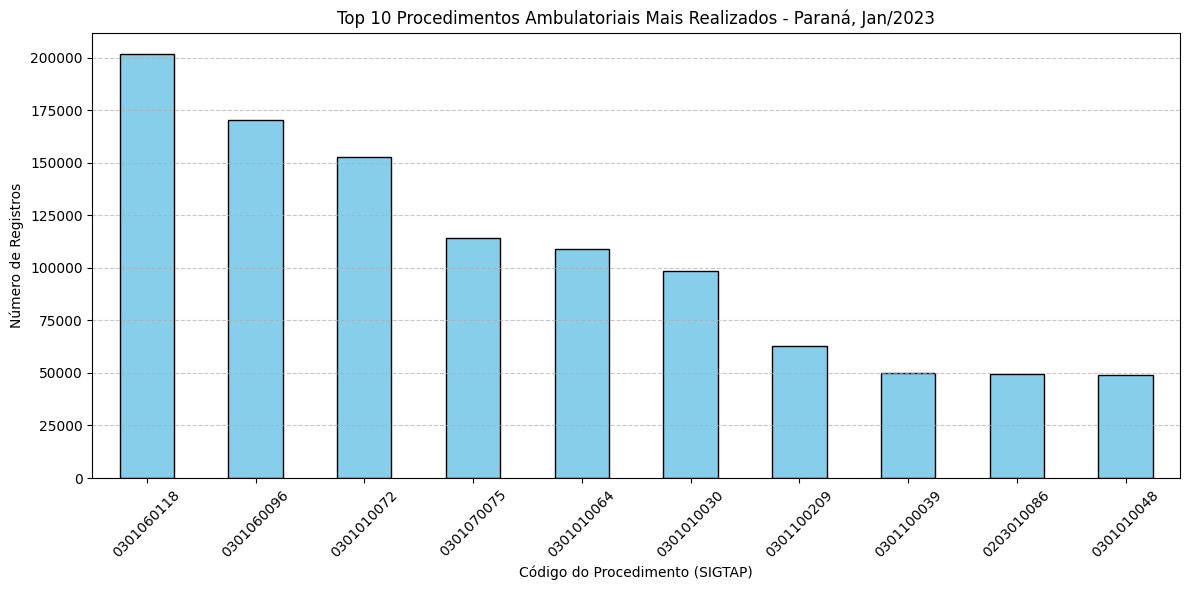

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pysus.online_data.SIA import download as download_sia

# Baixar dados do SIA/PA (Produção Ambulatorial) para PR, jan/2023
parquet_set = download_sia("PR", 2023, 1, "PA")
df_sia = parquet_set.to_dataframe()

# Contar frequência de cada procedimento
top_proc = df_sia['PA_PROC_ID'].value_counts().head(10)

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
top_proc.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Procedimentos Ambulatoriais Mais Realizados - Paraná, Jan/2023')
plt.xlabel('Código do Procedimento (SIGTAP)')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Mapeando os códigos no gráfico acima:

90646786it [00:00, 25255757745.91it/s]


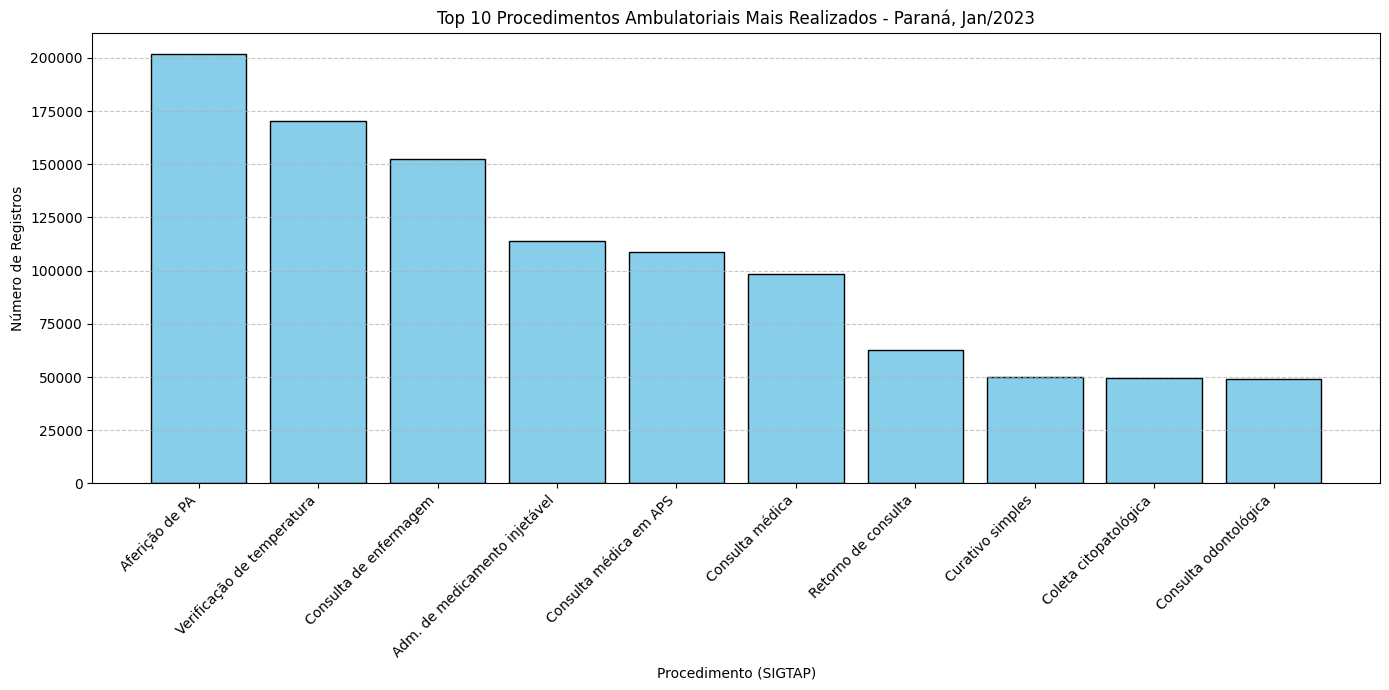

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pysus.online_data.SIA import download as download_sia

# Baixar dados ambulatoriais (PA) do Paraná - Janeiro de 2023
parquet_set = download_sia("PR", 2023, 1, "PA")
df_sia = parquet_set.to_dataframe()

# Obter os 10 procedimentos mais frequentes
top_proc = df_sia['PA_PROC_ID'].value_counts().head(10).reset_index()
top_proc.columns = ['PA_PROC_ID', 'frequencia']

# Dicionário de mapeamento manual com os nomes dos procedimentos
mapa_procedimentos = {
    '0301060118': 'Aferição de PA',
    '0301060096': 'Verificação de temperatura',
    '0301010072': 'Consulta de enfermagem',
    '0301070075': 'Adm. de medicamento injetável',
    '0301010064': 'Consulta médica em APS',
    '0301010030': 'Consulta médica',
    '0301100209': 'Retorno de consulta',
    '0301100039': 'Curativo simples',
    '0203010086': 'Coleta citopatológica',
    '0301010048': 'Consulta odontológica',
}

# Adicionar coluna com nome legível
top_proc['label'] = top_proc['PA_PROC_ID'].map(mapa_procedimentos).fillna(top_proc['PA_PROC_ID'])

# Plotar gráfico
plt.figure(figsize=(14, 7))
plt.bar(top_proc['label'], top_proc['frequencia'], color='skyblue', edgecolor='black')
plt.title('Top 10 Procedimentos Ambulatoriais Mais Realizados - Paraná, Jan/2023')
plt.xlabel('Procedimento (SIGTAP)')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





# 📊 1. Gráfico de Distribuição por Faixa Etária



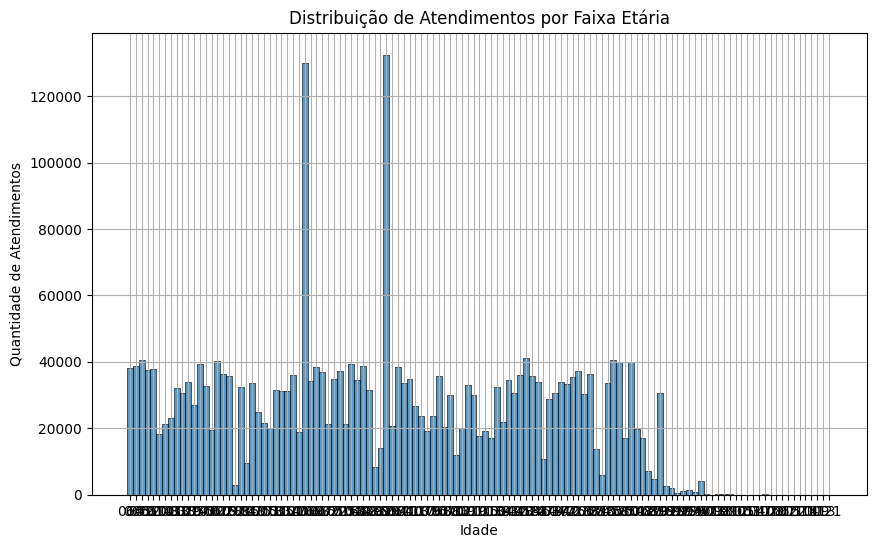

In [ ]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_sia['PA_IDADE'], bins=20, kde=False)
plt.title('Distribuição de Atendimentos por Faixa Etária')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Atendimentos')
plt.grid(True)
plt.show()

# 2. Top 10 Procedimentos Mais Frequentes

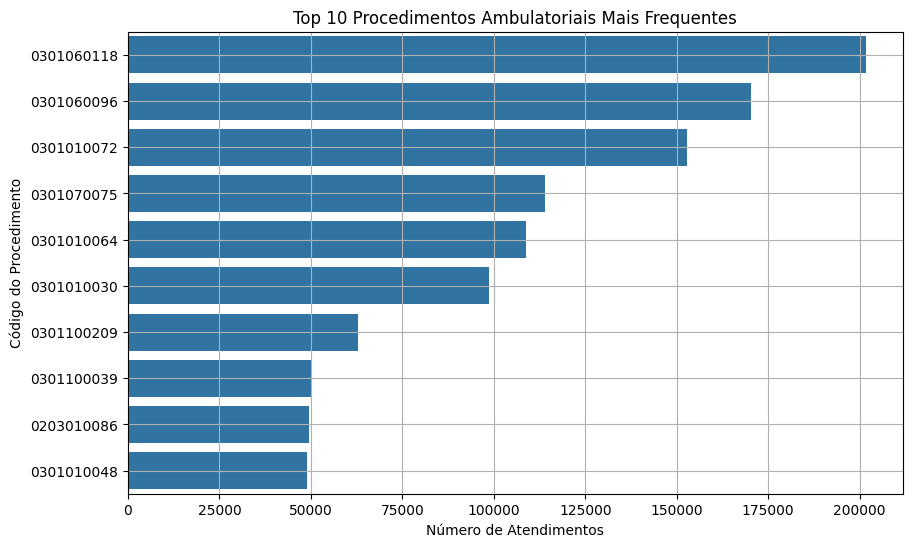

In [ ]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_proc = df_sia['PA_PROC_ID'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_proc.values, y=top_proc.index.astype(str))
plt.title('Top 10 Procedimentos Ambulatoriais Mais Frequentes')
plt.xlabel('Número de Atendimentos')
plt.ylabel('Código do Procedimento')
plt.grid(True)
plt.show()

# 📊 3. Procedimentos por Idade (Heatmap)

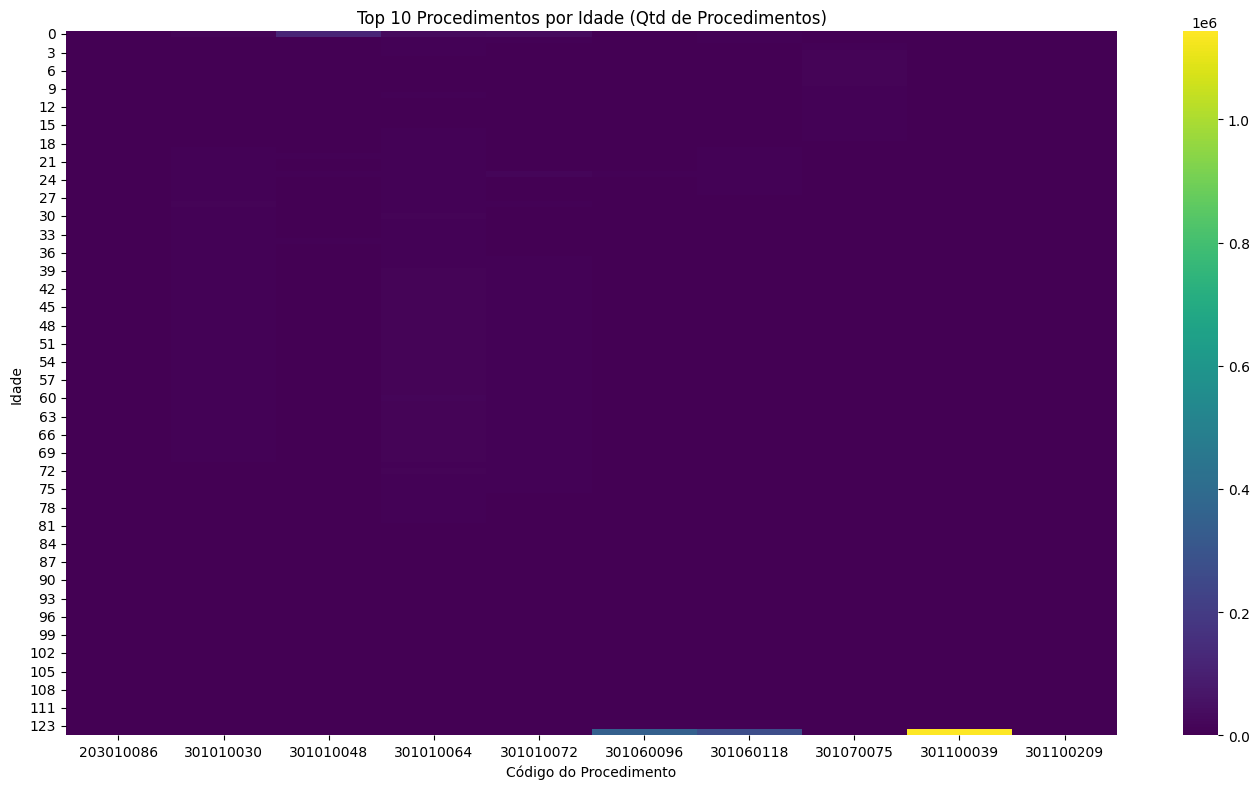

In [ ]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Forçar tipo numérico nas colunas necessárias
df_sia['PA_IDADE'] = pd.to_numeric(df_sia['PA_IDADE'], errors='coerce')
df_sia['PA_PROC_ID'] = pd.to_numeric(df_sia['PA_PROC_ID'], errors='coerce')
df_sia['PA_QTDPRO'] = pd.to_numeric(df_sia['PA_QTDPRO'], errors='coerce')

# Remover linhas com dados ausentes
df_heat = df_sia.dropna(subset=['PA_IDADE', 'PA_PROC_ID', 'PA_QTDPRO'])

# Filtrar para os 10 procedimentos mais comuns (para visualização mais limpa)
top_procs = df_heat['PA_PROC_ID'].value_counts().head(10).index
df_heat = df_heat[df_heat['PA_PROC_ID'].isin(top_procs)]

# Criar tabela dinâmica
pivot = df_heat.pivot_table(index='PA_IDADE', columns='PA_PROC_ID',
                            values='PA_QTDPRO', aggfunc='sum', fill_value=0)

# Garantir que todos os dados são do tipo float (evita erro do heatmap)
pivot = pivot.astype(float)

# Plotar o heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap='viridis')
plt.title('Top 10 Procedimentos por Idade (Qtd de Procedimentos)')
plt.xlabel('Código do Procedimento')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

# 📊 4. Distribuição por Sexo

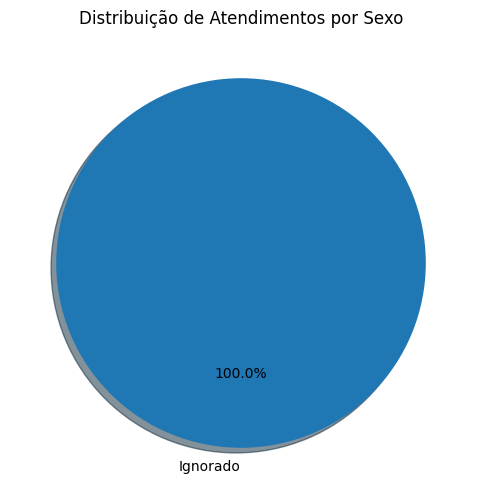

In [ ]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sexo_map = {'1': 'Masculino', '2': 'Feminino', '0': 'Ignorado'}
df_sia['PA_SEXO_LABEL'] = df_sia['PA_SEXO'].astype(str).map(sexo_map)

sexo_counts = df_sia['PA_SEXO_LABEL'].value_counts()

plt.figure(figsize=(6,6))
sexo_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribuição de Atendimentos por Sexo')
plt.ylabel('')
plt.show()

# 📊 5. Distribuição por Raça/Cor

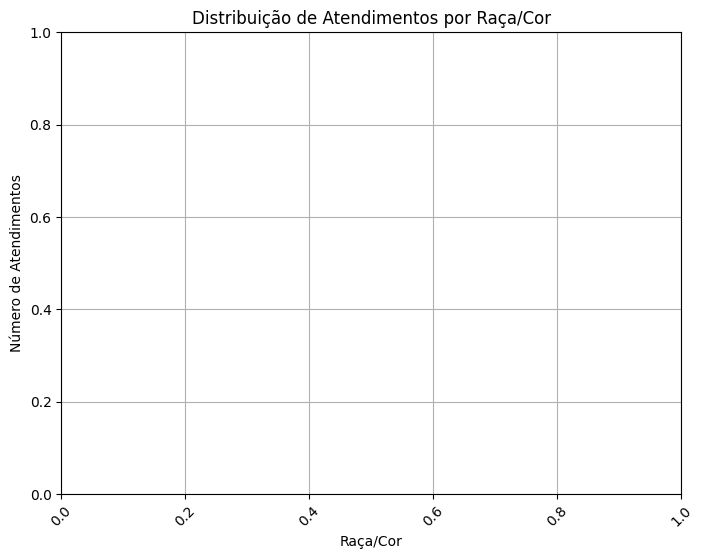

In [ ]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raca_map = {
    '1': 'Branca',
    '2': 'Preta',
    '3': 'Parda',
    '4': 'Amarela',
    '5': 'Indígena',
    '0': 'Ignorada'
}
df_sia['PA_RACACOR_LABEL'] = df_sia['PA_RACACOR'].astype(str).map(raca_map)

raca_counts = df_sia['PA_RACACOR_LABEL'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=raca_counts.index, y=raca_counts.values)
plt.title('Distribuição de Atendimentos por Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 📊 6. Valor Aprovado por Procedimento (Top 10)

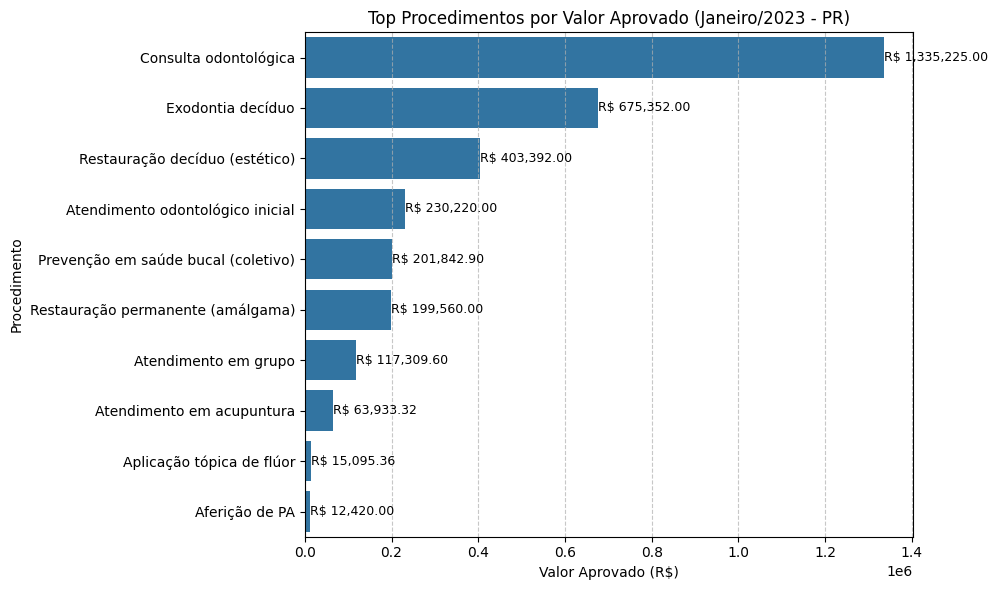

In [ ]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Forçar PA_VALAPR como float
df_sia['PA_VALAPR'] = pd.to_numeric(df_sia['PA_VALAPR'], errors='coerce')

# Garantir que PA_PROC_ID é string para mapeamento
df_sia['PA_PROC_ID'] = df_sia['PA_PROC_ID'].astype(str)

# Dicionário de nomes dos procedimentos
proc_nomes = {
    '212010050': 'Consulta odontológica',
    '701030348': 'Atendimento em acupuntura',
    '306010011': 'Restauração decíduo (estético)',
    '604630069': 'Atendimento em grupo',
    '212010018': 'Atendimento odontológico inicial',
    '306010038': 'Restauração permanente (amálgama)',
    '405050305': 'Aplicação tópica de flúor',
    '212020064': 'Prevenção em saúde bucal (coletivo)',
    '304060232': 'Exodontia decíduo',
    '202031020': 'Aferição de PA'
}

# Mapear os nomes dos procedimentos
df_sia['Nome_Procedimento'] = df_sia['PA_PROC_ID'].map(proc_nomes)

# Filtrar apenas os procedimentos mapeados e somar valor aprovado
val_aprovado = (
    df_sia[df_sia['PA_PROC_ID'].isin(proc_nomes.keys())]
    .groupby('Nome_Procedimento')['PA_VALAPR']
    .sum()
    .sort_values(ascending=False)
)

# Garantir que os valores são float
val_aprovado = val_aprovado.astype(float)

# Plotar gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=val_aprovado.values, y=val_aprovado.index, orient='h')
plt.title('Top Procedimentos por Valor Aprovado (Janeiro/2023 - PR)')
plt.xlabel('Valor Aprovado (R$)')
plt.ylabel('Procedimento')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Inserir valores no final de cada barra
for i, v in enumerate(val_aprovado.values):
    ax.text(v + 100, i, f'R$ {v:,.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()



Teste

In [ ]:
# Instalação do PySUS (caso ainda não esteja instalado)
!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

# Importações
from pysus.online_data.SIA import download as download_sia
import pandas as pd

# 🔽 Baixar os dados de Produção Ambulatorial (PA) do Paraná, janeiro de 2024
parquet_set = download_sia("PR", 2024, 1, "PA")
df_sia = parquet_set.to_dataframe()

# 📍 Filtro por município de Foz do Iguaçu
# Código IBGE de Foz do Iguaçu = 4108304
df_foz = df_sia[df_sia['PA_MUNPCN'] == '4108304']

# 🏥 Filtro por nome da unidade contendo 'AKLP' (ajuste se necessário)
df_foz_aklp = df_foz[df_foz['CNES_NOME_ESTABELECIMENTO'].str.contains('AKLP', case=False, na=False)]

# 🦷 Filtro por setor odontológico (buscando palavras como 'ODONTO')
df_foz_aklp_odonto = df_foz_aklp[df_foz_aklp['PA_AREA'].str.contains('ODONTO', case=False, na=False)]

# 🔍 Visualizar os primeiros resultados
df_foz_aklp_odonto.head()


  Cloning https://github.com/AlertaDengue/PySUS.git to /tmp/pip-req-build-dnyftp2z
  Running command git clone --filter=blob:none --quiet https://github.com/AlertaDengue/PySUS.git /tmp/pip-req-build-dnyftp2z
  Resolved https://github.com/AlertaDengue/PySUS.git to commit 54f7800db4da5171d55e3446d638d64beeb8b149
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


PAPR2401.parquet: 100%|██████████| 6.44M/6.44M [04:55<00:00, 21.8kB/s]


KeyError: 'CNES_NOME_ESTABELECIMENTO'

In [ ]:
from pysus.online_data.SIA import download as download_sia
import pandas as pd

# Baixar dados do SIA/PA (Produção Ambulatorial) para PR - Janeiro de 2024
parquet_set = download_sia("PR", 2024, 1, "PA")
df_sia = parquet_set.to_dataframe()

# Filtrar registros do CNES da AKLP
df_aklp = df_sia[df_sia['CNES'] == '2673002']

# Converter PA_PROC_ID para string (caso necessário)
df_aklp['PA_PROC_ID'] = df_aklp['PA_PROC_ID'].astype(str)

# Filtrar apenas procedimentos odontológicos — códigos que começam com "03"
df_aklp_odonto = df_aklp[df_aklp['PA_PROC_ID'].str.startswith('03')]

# Visualizar os primeiros resultados
df_aklp_odonto.head()


ModuleNotFoundError: No module named 'pysus'

In [ ]:
df_sia.columns

Index(['PA_CODUNI', 'PA_GESTAO', 'PA_CONDIC', 'PA_UFMUN', 'PA_REGCT',
       'PA_INCOUT', 'PA_INCURG', 'PA_TPUPS', 'PA_TIPPRE', 'PA_MN_IND',
       'PA_CNPJCPF', 'PA_CNPJMNT', 'PA_CNPJ_CC', 'PA_MVM', 'PA_CMP',
       'PA_PROC_ID', 'PA_TPFIN', 'PA_SUBFIN', 'PA_NIVCPL', 'PA_DOCORIG',
       'PA_AUTORIZ', 'PA_CNSMED', 'PA_CBOCOD', 'PA_MOTSAI', 'PA_OBITO',
       'PA_ENCERR', 'PA_PERMAN', 'PA_ALTA', 'PA_TRANSF', 'PA_CIDPRI',
       'PA_CIDSEC', 'PA_CIDCAS', 'PA_CATEND', 'PA_IDADE', 'IDADEMIN',
       'IDADEMAX', 'PA_FLIDADE', 'PA_SEXO', 'PA_RACACOR', 'PA_MUNPCN',
       'PA_QTDPRO', 'PA_QTDAPR', 'PA_VALPRO', 'PA_VALAPR', 'PA_UFDIF',
       'PA_MNDIF', 'PA_DIF_VAL', 'NU_VPA_TOT', 'NU_PA_TOT', 'PA_INDICA',
       'PA_CODOCO', 'PA_FLQT', 'PA_FLER', 'PA_ETNIA', 'PA_VL_CF', 'PA_VL_CL',
       'PA_VL_INC', 'PA_SRV_C', 'PA_INE', 'PA_NAT_JUR'],
      dtype='object')

In [ ]:
from pysus.online_data.SIA import download as download_sia
import pandas as pd

# Baixar os dados do SIA/PA para o Paraná, janeiro de 2024
parquet_set = download_sia("PR", 2024, 3, "PA")
df_sia = parquet_set.to_dataframe()

# Filtrar registros da unidade AKLP (CNES = 2673002)
df_aklp = df_sia[df_sia['PA_CODUNI'] == '2673002']

# Converter o código do procedimento para string (caso necessário)
df_aklp['PA_PROC_ID'] = df_aklp['PA_PROC_ID'].astype(str)

# Filtrar apenas os procedimentos odontológicos — códigos que começam com "03"
df_aklp_odonto = df_aklp[df_aklp['PA_PROC_ID'].str.startswith('03')]

# Visualizar os primeiros registros
df_aklp_odonto.head()


PAPR2403.parquet: 100%|██████████| 7.46M/7.46M [05:57<00:00, 20.9kB/s]


In [ ]:
from pysus.online_data.SIA import download as download_sia
import pandas as pd

# Baixar os dados do SIA/PA para o Paraná, janeiro de 2024
parquet_set = download_sia("PR", 2024, 1, "PA")
df_sia = parquet_set.to_dataframe()

# Garantir que o código do procedimento está como string
df_sia['PA_PROC_ID'] = df_sia['PA_PROC_ID'].astype(str)

# Filtrar apenas os procedimentos odontológicos — códigos que começam com "03"
df_odonto = df_sia[df_sia['PA_PROC_ID'].str.startswith('03')]

# Visualizar os primeiros registros
df_odonto.head()


106309930it [00:00, 33680501898.84it/s]


,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,...,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR
2,2736608,410000,EP,410480,0000,0000,0000,36,00,I,...,1,K,0,,0.00,0.00,0.00,135002,,3999
3,2736608,410000,EP,410480,0000,0000,0000,36,00,I,...,1,K,0,,0.00,0.00,0.00,135002,,3999
5,2587785,410000,EP,410440,0000,0000,0000,05,00,M,...,1,K,0,,0.00,0.00,0.00,,,1244
6,2687135,410000,EP,411770,0000,0000,0000,36,00,M,...,1,R,0,,0.00,0.00,0.00,135003,,1244
7,2687135,410000,EP,411770,0000,0000,0000,36,00,M,...,1,K,0,,0.00,0.00,0.00,126005,,1244


# Teste de CNES e número de dentistas em Foz

In [ ]:
# Instala o PySUS atualizado diretamente do GitHub
!pip install git+https://github.com/danicat/pysus.git --upgrade
!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

# Importa as funções necessárias
from pysus.online_data.CNES import download as download_cnes

# Define parâmetros
estado = "PR"
ano = 2023
mes = 1

# Baixa os dados do módulo PF (Profissionais de Saúde)
parquet_set = download_cnes("PF", states=[estado], years=[ano], months=[mes])

# Converte para DataFrame
df_pf = parquet_set.to_dataframe()

# Filtra os cirurgiões-dentistas: CBO começa com '2232'
df_dentistas = df_pf[df_pf['CBO'].str.startswith('2232', na=False)]

# Filtra para Foz do Iguaçu: código do município é 412820
dentistas_foz = df_dentistas[df_dentistas['CODUFMUN'] == 412820]

# Exibe a quantidade total
print(f"Quantidade de cirurgiões-dentistas em Foz do Iguaçu: {dentistas_foz.shape[0]}")

# (Opcional) Exibe algumas colunas relevantes
dentistas_foz[['CNES', 'CBO', 'NOMEPROF', 'CNS_PROF']].head()


In [ ]:
print(df_pf.columns.tolist())

['CNES', 'CODUFMUN', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'CPF_PROF', 'CPFUNICO', 'CBO', 'CBOUNICO', 'NOMEPROF', 'CNS_PROF', 'CONSELHO', 'REGISTRO', 'VINCULAC', 'VINCUL_C', 'VINCUL_A', 'VINCUL_N', 'PROF_SUS', 'PROFNSUS', 'HORAOUTR', 'HORAHOSP', 'HORA_AMB', 'COMPETEN', 'UFMUNRES', 'NAT_JUR']


In [ ]:

# Importações
from pysus.online_data.CNES import download as download_cnes

# Parâmetros
estado = "PR"
ano = 2023
mes = 1

# Baixa os dados do módulo PF (Profissionais de Saúde)
parquet_set = download_cnes("PF", states=[estado], years=[ano], months=[mes])

# Converte para DataFrame
df_pf = parquet_set.to_dataframe()

# Filtra cirurgiões-dentistas: CBO começa com '2232'
df_dentistas = df_pf[df_pf['CBO'].str.startswith('2232', na=False)]

# Filtra por município de Foz do Iguaçu: código 412820
dentistas_foz = df_dentistas[df_dentistas['CODUFMUN'] == 412820]

# Exibe a quantidade total
print(f"Quantidade de cirurgiões-dentistas em Foz do Iguaçu: {dentistas_foz.shape[0]}")

# Visualiza algumas colunas relevantes
dentistas_foz[['CNES', 'CBO', 'NOMEPROF', 'CNS_PROF']].head()


16602855it [00:00, 14753690919.05it/s]


Quantidade de cirurgiões-dentistas em Foz do Iguaçu: 0


,CNES,CBO,NOMEPROF,CNS_PROF


In [ ]:
print(df_pf['CODUFMUN'].unique())

<StringArray>
['411370', '411373', '411375', '411380', '411390', '411400', '411410',
 '411420', '411430', '411435',
 ...
 '411915', '411920', '411925', '411930', '411940', '411950', '411960',
 '411965', '411970', '411980']
Length: 399, dtype: string


In [ ]:
print("Foz do Iguaçu presente?", '410830' in df_pf['CODUFMUN'].astype(str).values)


Foz do Iguaçu presente? True


In [ ]:

# Importações
from pysus.online_data.CNES import download as download_cnes
import pandas as pd

# Parâmetros
estado = "PR"
ano = 2023
mes = 1

# Baixar dados dos profissionais (PF) do CNES
parquet_set = download_cnes("PF", states=[estado], years=[ano], months=[mes])

# Converter para DataFrame
df_pf = parquet_set.to_dataframe()

# Padronizar colunas relevantes
df_pf['CBO'] = df_pf['CBO'].astype(str).str.strip()
df_pf['CODUFMUN'] = df_pf['CODUFMUN'].astype(str).str.strip()

# Filtro 1: cirurgiões-dentistas (CBO começa com 2232)
df_dentistas = df_pf[df_pf['CBO'].str.startswith('2232', na=False)]

# Filtro 2: município de Foz do Iguaçu (código IBGE 410830, sem dígito verificador)
dentistas_foz = df_dentistas[df_dentistas['CODUFMUN'] == '410830']

# Resultado principal
print(f"🦷 Quantidade de cirurgiões-dentistas em Foz do Iguaçu: {dentistas_foz.shape[0]}")

# Exibir os primeiros nomes
print("\n👤 Exemplos de profissionais:")
display(dentistas_foz[['CNES', 'CBO', 'NOMEPROF', 'CNS_PROF']].head())

# Contar por estabelecimento de saúde
print("\n🏥 Dentistas por unidade de saúde (CNES):")
print(dentistas_foz.groupby('CNES').size().sort_values(ascending=False).head(10))

# Contar por especialidade odontológica (CBO)
print("\n📚 Dentistas por especialidade (CBO):")
print(dentistas_foz['CBO'].value_counts())


16602855it [00:00, 1902869743.63it/s]


🦷 Quantidade de cirurgiões-dentistas em Foz do Iguaçu: 299

👤 Exemplos de profissionais:


,CNES,CBO,NOMEPROF,CNS_PROF
70055,0698547,223208,KARIN ROBERTA KLEIN ...,706705502239710
70056,0698547,223208,RODRIGO GOMES DE SOUZA ...,706104860613530
70057,0698547,223208,PATRICIA FREITAG ANTUNES ...,701807219355977
70060,0698547,223208,CINTIA CLAUDINO DOS SANTOS VIDAL ...,980016294186906
70061,0698547,223208,DANIEL HERMINIO DE ARAUJO ...,701802293944978



🏥 Dentistas por unidade de saúde (CNES):
CNES
6613136    15
2593939    15
2591049    12
0698547    11
5599601     9
5061989     9
3480887     8
6040195     7
9350578     7
5699673     6
dtype: int64

📚 Dentistas por especialidade (CBO):
CBO
223208    140
223293     54
223268     21
223240     15
223248     14
223224     12
223212     12
223236      8
223256      8
223260      8
223280      3
223232      2
223288      1
223276      1
Name: count, dtype: int64


16602855it [00:00, 7430369306.22it/s]


🦷 Quantidade de cirurgiões-dentistas em Foz do Iguaçu: 299


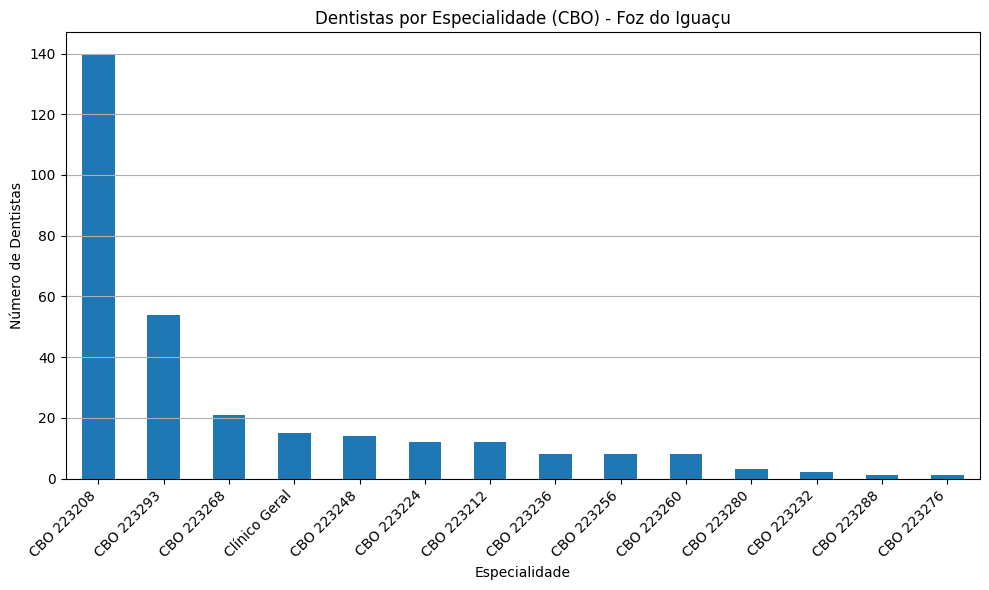

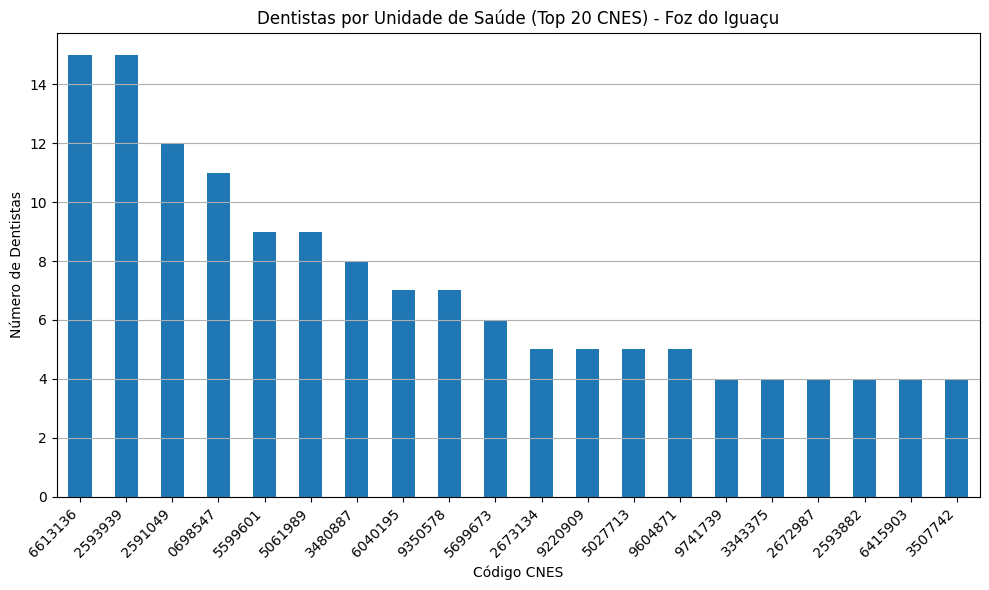

In [ ]:

# Importações
import pandas as pd
import matplotlib.pyplot as plt
from pysus.online_data.CNES import download as download_cnes

# Parâmetros
estado = "PR"
ano = 2023
mes = 1

# Baixar dados do CNES - módulo PF (Profissionais)
parquet_set = download_cnes("PF", states=[estado], years=[ano], months=[mes])
df_pf = parquet_set.to_dataframe()

# Padronizar colunas
df_pf['CBO'] = df_pf['CBO'].astype(str).str.strip()
df_pf['CODUFMUN'] = df_pf['CODUFMUN'].astype(str).str.strip()

# Filtrar dentistas (CBO inicia com 2232)
df_dentistas = df_pf[df_pf['CBO'].str.startswith('2232', na=False)]

# Filtrar Foz do Iguaçu (CODUFMUN == 410830)
dentistas_foz = df_dentistas[df_dentistas['CODUFMUN'] == '410830']

# Exibir quantidade
print(f"🦷 Quantidade de cirurgiões-dentistas em Foz do Iguaçu: {dentistas_foz.shape[0]}")

# =====================
# GRÁFICO 1 - CBO
# =====================

# Mapeamento de CBOs para nomes legíveis
cbo_map = {
    '223240': 'Clínico Geral',
    '223241': 'Ortodontista',
    '223242': 'Endodontista',
    '223243': 'Periodontista',
    '223244': 'Bucomaxilofacial',
    # Adicione mais conforme necessário
}

# Contagem por especialidade
cbo_counts = dentistas_foz['CBO'].value_counts().sort_values(ascending=False)
cbo_counts_named = cbo_counts.rename(index=lambda x: cbo_map.get(x, f"CBO {x}"))

# Gráfico por CBO
plt.figure(figsize=(10, 6))
cbo_counts_named.plot(kind='bar')
plt.title('Dentistas por Especialidade (CBO) - Foz do Iguaçu')
plt.xlabel('Especialidade')
plt.ylabel('Número de Dentistas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# =====================
# GRÁFICO 2 - CNES
# =====================

# Contagem por unidade de saúde (CNES)
cnes_counts = dentistas_foz['CNES'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cnes_counts.head(20).plot(kind='bar')
plt.title('Dentistas por Unidade de Saúde (Top 20 CNES) - Foz do Iguaçu')
plt.xlabel('Código CNES')
plt.ylabel('Número de Dentistas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


16602855it [00:00, 14943652604.70it/s]


🦷 Quantidade de cirurgiões-dentistas em Foz do Iguaçu: 299


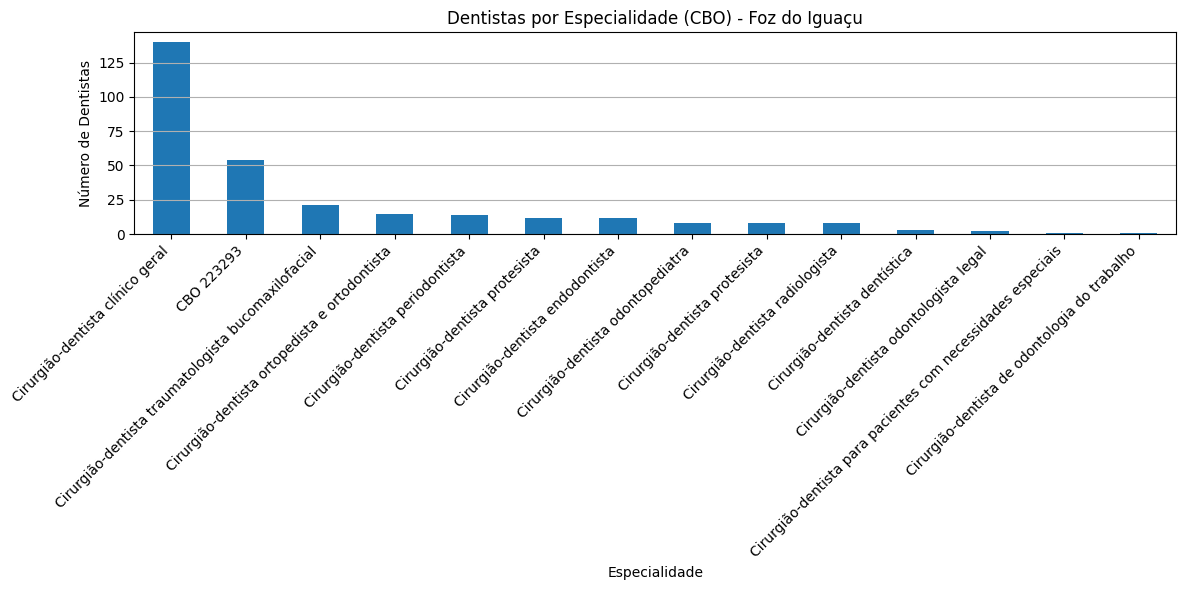

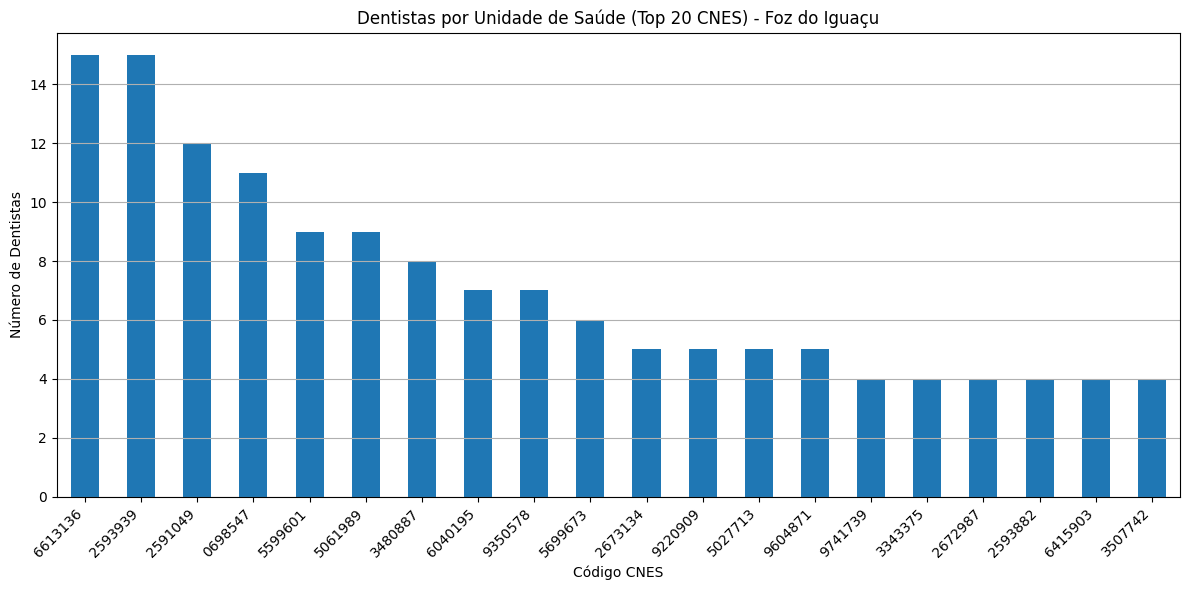

In [ ]:

# Importações
import pandas as pd
import matplotlib.pyplot as plt
from pysus.online_data.CNES import download as download_cnes

# Parâmetros
estado = "PR"
ano = 2023
mes = 1

# Baixar dados do CNES - módulo PF (Profissionais)
parquet_set = download_cnes("PF", states=[estado], years=[ano], months=[mes])
df_pf = parquet_set.to_dataframe()

# Padronizar colunas
df_pf['CBO'] = df_pf['CBO'].astype(str).str.strip()
df_pf['CODUFMUN'] = df_pf['CODUFMUN'].astype(str).str.strip()

# Filtrar dentistas (CBO inicia com 2232)
df_dentistas = df_pf[df_pf['CBO'].str.startswith('2232', na=False)]

# Filtrar Foz do Iguaçu (CODUFMUN == 410830)
dentistas_foz = df_dentistas[df_dentistas['CODUFMUN'] == '410830']

# Exibir quantidade
print(f"🦷 Quantidade de cirurgiões-dentistas em Foz do Iguaçu: {dentistas_foz.shape[0]}")

# =====================
# GRÁFICO 1 - CBO
# =====================

# Mapeamento de CBOs para nomes legíveis
cbo_map = {
    '223208': 'Cirurgião-dentista clínico geral',
    '223212': 'Cirurgião-dentista endodontista',
    '223216': 'Cirurgião-dentista ortodontista',
    '223220': 'Cirurgião-dentista periodontista',
    '223224': 'Cirurgião-dentista protesista',
    '223228': 'Cirurgião-dentista odontogeriatra',
    '223232': 'Cirurgião-dentista odontologista legal',
    '223236': 'Cirurgião-dentista odontopediatra',
    '223240': 'Cirurgião-dentista ortopedista e ortodontista',
    '223244': 'Cirurgião-dentista patologista bucal',
    '223248': 'Cirurgião-dentista periodontista',
    '223252': 'Cirurgião-dentista protesiólogo bucomaxilofacial',
    '223256': 'Cirurgião-dentista protesista',
    '223260': 'Cirurgião-dentista radiologista',
    '223264': 'Cirurgião-dentista reabilitador oral',
    '223268': 'Cirurgião-dentista traumatologista bucomaxilofacial',
    '223272': 'Cirurgião-dentista de saúde coletiva',
    '223276': 'Cirurgião-dentista de odontologia do trabalho',
    '223280': 'Cirurgião-dentista dentística',
    '223284': 'Cirurgião-dentista estomatologista',
    '223288': 'Cirurgião-dentista para pacientes com necessidades especiais'
}

# Contagem por especialidade
cbo_counts = dentistas_foz['CBO'].value_counts().sort_values(ascending=False)
cbo_counts_named = cbo_counts.rename(index=lambda x: cbo_map.get(x, f"CBO {x}"))

# Gráfico por CBO
plt.figure(figsize=(12, 6))
cbo_counts_named.plot(kind='bar')
plt.title('Dentistas por Especialidade (CBO) - Foz do Iguaçu')
plt.xlabel('Especialidade')
plt.ylabel('Número de Dentistas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# =====================
# GRÁFICO 2 - CNES
# =====================

# Contagem por unidade de saúde (CNES)
cnes_counts = dentistas_foz['CNES'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
cnes_counts.head(20).plot(kind='bar')
plt.title('Dentistas por Unidade de Saúde (Top 20 CNES) - Foz do Iguaçu')
plt.xlabel('Código CNES')
plt.ylabel('Número de Dentistas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
